In [102]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [103]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [104]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [105]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [106]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [107]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

623

In [108]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | desaguadero
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saint-francois
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | havre
Processing Record 6 of Set 1 | sabang
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | peace river
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | catanzaro
Processing Record 15 of Set 1 | saiha
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | atka
City not found. Skipping
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | owando
Processing Record 23 of Set 1 | nanortalik
Processing Record 24 of Se

In [109]:
len(city_data)

561

In [110]:
# Add the data to a list in a dict then at the DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Desaguadero,PE,2022-06-11 14:05:12,-16.5656,-69.0417,40.84,51,5,3.76
1,Ushuaia,AR,2022-06-11 13:57:39,-54.8000,-68.3000,38.86,87,0,5.75
2,Saint-Francois,FR,2022-06-11 14:05:13,46.4154,3.9054,85.68,41,0,3.44
3,Rikitea,PF,2022-06-11 14:00:40,-23.1203,-134.9692,73.85,81,40,15.43
4,Havre,FR,2022-06-11 14:05:15,49.5833,0.3333,71.35,42,0,8.05


In [111]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Desaguadero,PE,2022-06-11 14:05:12,-16.5656,-69.0417,40.84,51,5,3.76
1,Ushuaia,AR,2022-06-11 13:57:39,-54.8000,-68.3000,38.86,87,0,5.75
2,Saint-Francois,FR,2022-06-11 14:05:13,46.4154,3.9054,85.68,41,0,3.44
3,Rikitea,PF,2022-06-11 14:00:40,-23.1203,-134.9692,73.85,81,40,15.43
4,Havre,FR,2022-06-11 14:05:15,49.5833,0.3333,71.35,42,0,8.05
5,Sabang,ID,2022-06-11 14:03:16,5.8933,95.3214,83.03,76,95,13.58
6,Severo-Kurilsk,RU,2022-06-11 14:00:34,50.6789,156.1250,43.50,87,89,9.71
7,Peace River,CA,2022-06-11 14:00:59,56.2501,-117.2860,54.66,73,22,3.00
8,Mataura,NZ,2022-06-11 14:00:35,-46.1927,168.8643,33.48,95,59,5.08
9,Port Alfred,ZA,2022-06-11 14:01:14,-33.5906,26.8910,77.09,35,72,9.93


In [112]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Desaguadero,PE,2022-06-11 14:05:12,-16.5656,-69.0417,40.84,51,5,3.76
1,Ushuaia,AR,2022-06-11 13:57:39,-54.8000,-68.3000,38.86,87,0,5.75
2,Saint-Francois,FR,2022-06-11 14:05:13,46.4154,3.9054,85.68,41,0,3.44
3,Rikitea,PF,2022-06-11 14:00:40,-23.1203,-134.9692,73.85,81,40,15.43
4,Havre,FR,2022-06-11 14:05:15,49.5833,0.3333,71.35,42,0,8.05
5,Sabang,ID,2022-06-11 14:03:16,5.8933,95.3214,83.03,76,95,13.58
6,Severo-Kurilsk,RU,2022-06-11 14:00:34,50.6789,156.1250,43.50,87,89,9.71
7,Peace River,CA,2022-06-11 14:00:59,56.2501,-117.2860,54.66,73,22,3.00
8,Mataura,NZ,2022-06-11 14:00:35,-46.1927,168.8643,33.48,95,59,5.08
9,Port Alfred,ZA,2022-06-11 14:01:14,-33.5906,26.8910,77.09,35,72,9.93


In [114]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [121]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [129]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654959631.5000763

In [130]:
time =time.strftime("%x")
today

1654959631.5000763

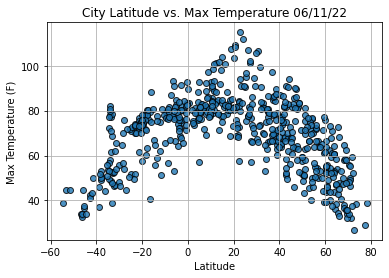

In [135]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

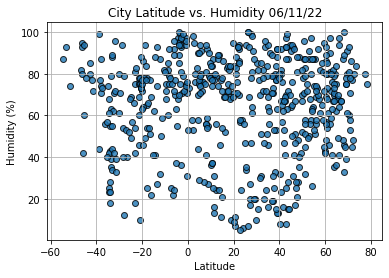

In [136]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

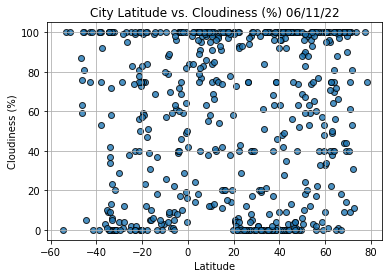

In [137]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

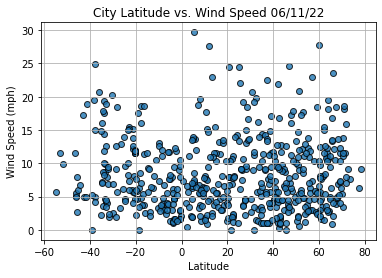

In [141]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [140]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [119]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

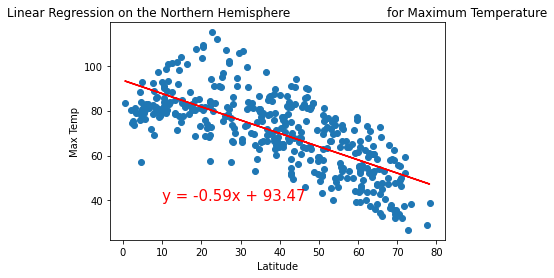

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))